### Problem Statement

#### Objective
The aim of this project is to develop a sophisticated classification model to predict the credit risk of bank customers. By leveraging a diverse set of customer attributes, the model will identify whether a customer poses a high or low credit risk, thereby assisting banks in making data-driven lending decisions.

#### Dataset Overview
The dataset encompasses a comprehensive set of 21 features that encapsulate the financial status, personal information, and credit history of bank customers. The primary attributes include:

- **Checking Status**: Current status of the customer's checking account (e.g., no checking account, balance <200, etc.).
- **Duration**: Length of the credit in months.
- **Credit History**: Record of the customer's past credit performance (e.g., critical/other existing credit, existing paid, etc.).
- **Purpose**: Reason for which the credit is requested (e.g., new car, education, furniture/equipment, etc.).
- **Credit Amount**: Total amount of credit applied for.
- **Savings Status**: Status of the customer's savings account (e.g., no known savings, <100, 500<=X<1000, etc.).
- **Employment**: Duration of the customer’s current employment (e.g., unemployed, 1<=X<4 years, >=7 years, etc.).
- **Installment Commitment**: Portion of the customer's disposable income that will be used to repay the credit.
- **Personal Status**: Marital status and gender of the customer (e.g., male single, female div/dep/mar).
- **Other Parties**: Presence of other guarantors or co-applicants.
- **Residence Since**: Duration of residence at the current address.
- **Property Magnitude**: Type and magnitude of property owned by the customer (e.g., real estate, life insurance).
- **Age**: Customer’s age.
- **Other Payment Plans**: Availability of other payment plans (e.g., bank, none).
- **Housing**: Housing situation of the customer (e.g., own, rent, for free).
- **Existing Credits**: Number of existing credits at the bank.
- **Job**: Type of job held by the customer (e.g., skilled, unskilled resident).
- **Number of Dependents**: Number of dependents reliant on the customer.
- **Own Telephone**: Whether the customer has a telephone registered in their name.
- **Foreign Worker**: Status of the customer as a foreign worker.
- **Class**: Target variable indicating whether the customer is a 'good' or 'bad' credit risk.

#### Problem Explanation
In the financial sector, accurately assessing the credit risk associated with potential borrowers is paramount to minimizing defaults and ensuring financial stability. Banks and financial institutions must evaluate multiple factors that could influence a customer's ability to repay borrowed amounts. This project aims to create a predictive model based on historical data to classify future loan applicants into 'good' or 'bad' credit risk categories.

#### Methodology
1. **Data Preprocessing**: Clean and preprocess the data by handling missing values, encoding categorical variables, and normalizing numerical features to ensure the dataset is ready for modeling.
2. **Exploratory Data Analysis (EDA)**: Conduct a thorough analysis to understand the distribution and relationships among features. Identify key predictors and visualize data patterns to gain insights into factors affecting credit risk.
3. **Model Selection**: Experiment with various classification algorithms, including Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting, to identify the most effective model.
4. **Model Training**: Split the dataset into training and testing subsets. Train the model on the training data and optimize hyperparameters to enhance performance.
5. **Model Evaluation**: Evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure it reliably classifies credit risk.
6. **Deployment**: Deploy the final model for real-time credit risk assessment. Integrate the model into the bank's decision-making process to facilitate data-driven lending decisions.

#### Expected Outcomes
The anticipated outcomes of this project include:

- **Reliable Classification**: A robust predictive model that accurately classifies customers as 'good' or 'bad' credit risks.
- **Informed Decision-Making**: Enhanced ability for banks to make informed lending decisions, reducing the likelihood of defaults.
- **Financial Stability**: Improved financial stability and profitability for the bank by minimizing credit losses and better managing credit portfolios.
- **Automation**: Streamlined and automated risk assessment processes, allowing for quicker and more efficient credit evaluations.

By implementing this model, banks can significantly enhance their credit risk management strategies, ensuring a more secure and profitable lending environment.

## 1. Reading the data

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 
from scipy import stats
from scipy.stats import pearsonr # calculates the Pearson correlation coefficient between each feature and a target variable in a dataset. 
# It then visualizes these correlations using a bar plot.

# Sklearn
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [2]:
credit_data = pd.read_csv('../datasets/raw/credit-g.csv')

In [3]:
credit_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [4]:
credit_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13   other_payment_plans    1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
credit_data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', ' other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       ' foreign_worker', 'class'],
      dtype='object')

In [6]:
credit_data.shape

(1000, 21)

In [7]:
credit_data.describe()
# provides a statistical summary of the numerical columns in the dataset.

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
credit_data.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
 other_payment_plans        3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
 foreign_worker             2
class                       2
dtype: int64

From above outputs we learn, among other things:

* There are as little as 1,000 rows and 21 columns in the dataset (including the target variable). Seemingly no missing values.
* Some column names contain empty strings which can be removed to make our work easier.
* Half of the loans are paid back within 18 months.
* 75% of the credit amounts are below 4,000, while the average is around 3,300. Highest is 18k. Relatively low. Seems like these can be fast loans, a.k.a SMS loans or similar.
* The average age of the customer is around 36 years.
* Most of the variables have few unique values. Only `duration`, `credit_amount` and `age` have more than 10 unique values.


We can additionally plot categorical and numerical variables to get a better understanding of their distribution.

In [9]:
credit_data.rename(columns=lambda x: x.strip(), inplace=True)

### Numerical Variables
Let's plot the distribution of the numerical variables; `duration`, `credit_amount` and `age`. We can argue whether `duration` and `age` are discrete or continuous, but for the purpose of plotting, we can use the same approach. Split by class to get an understanding of the difference in distribution.

/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/1581811501.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Good", "Bad"], size=12)  # Set tick labels after setting ticks
/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/1581811501.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Good", "Bad"], size=12)  # Set tick labels after setting ticks
/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/1581811501.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Good", "Bad"], size=12)  # Set tick labels after setting ticks


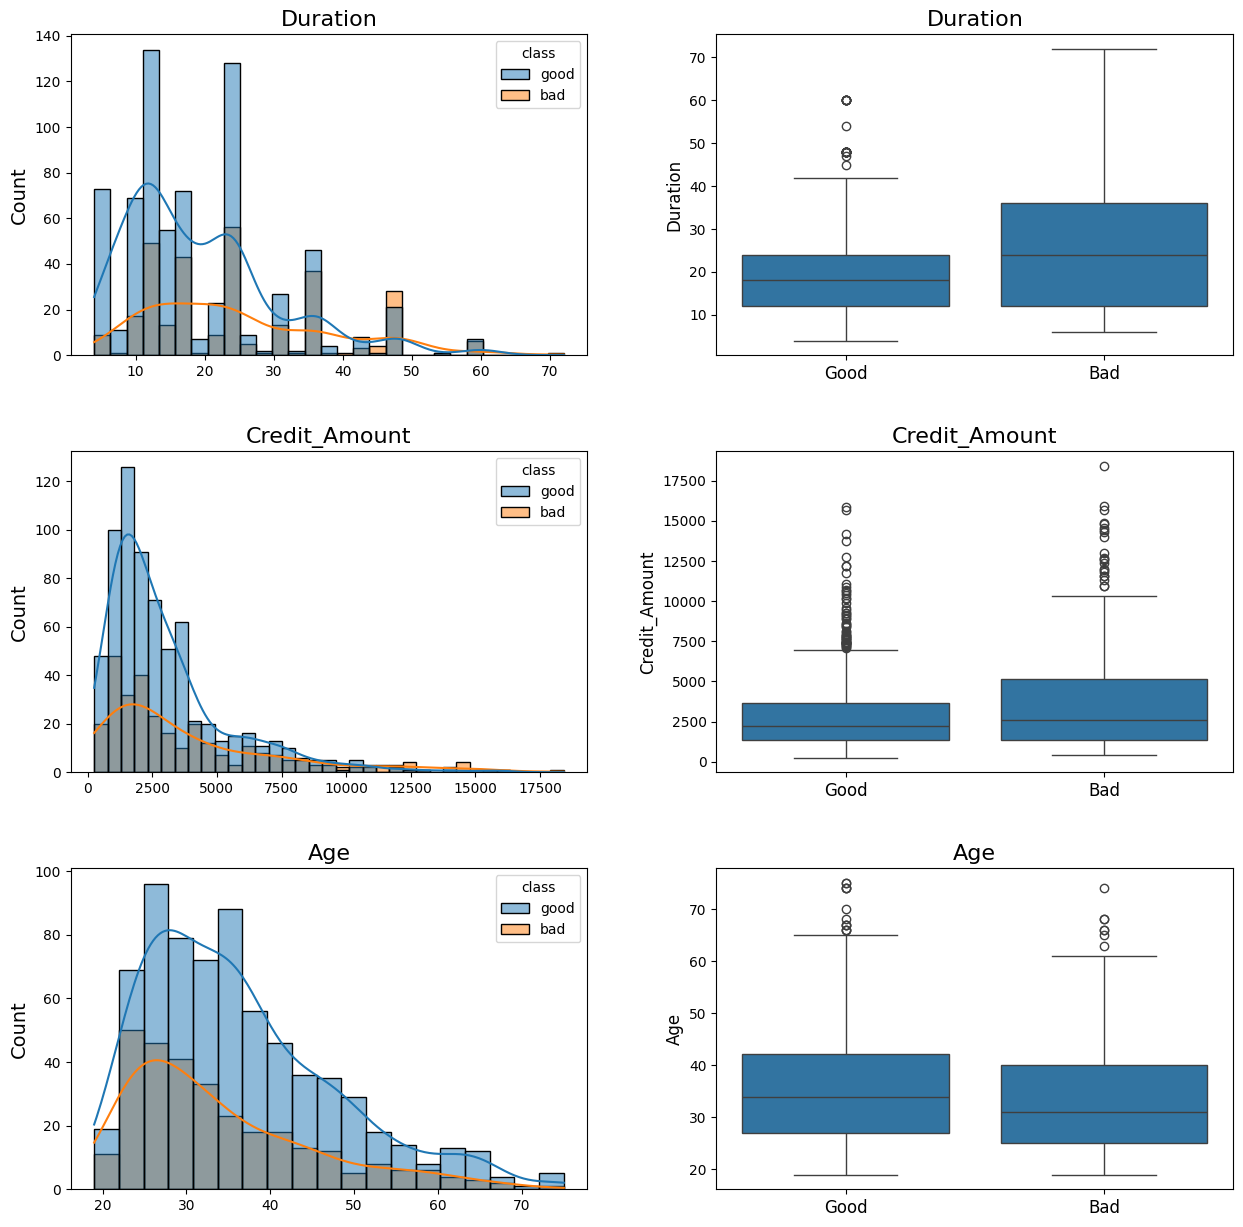

In [10]:
# Select numerical variables
numerical = ['duration', 'credit_amount', 'age']

# Specify plot size and loop over each variable
plt.figure(figsize=(15, 15))
i = 1
for col in numerical:   
    # Plot the data using histograms, split by class
    plt.subplot(3, 2, i)
    sns.histplot(x=col, data=credit_data, hue='class', kde=True)
    plt.title(col.title(), size=16)
    plt.xlabel("")
    plt.ylabel("Count", size=14)
    
    # Plot the data using Boxplots
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(x='class', y=col, data=credit_data)
    ax.set_xticklabels(["Good", "Bad"], size=12)  # Set tick labels after setting ticks
    ax.set_xlabel("")  # Set x-label to empty string for better visualization
    plt.title(col.title(), size=16)
    plt.ylabel(col.title(), size=12)
    
    i += 2
    
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()


* The median duration for bad credit risk is slightly higher than for good credit risk.
* Most credits are lower than 5,000. 75% are lower than 4,000 as we saw earlier.
* Most credits are taken by relatively young people - 40 or younger. Those with bad credit risk are in general slightly younger.
* Although none are extreme, there are some outliers. This can and should be confirmed with a statistical method such as the z-score or Tukey's method. The boxplots above are based on the same interquartile range (IQR) method as Tukey's method. Using the standard threshold of 1.5 * IQR we see that there are quite a lot of outliers in the credit_amount column. However, all in all, most values seem reasonable and we can leave them as they are for now.


By a visual inspection, none of the distributions seem normal. We should test for normality with a test such as Shapiro-Wilk though. For samples sizes > 5,000 the test statistic is accurate but the p-value might not be. Since our sample size is 1,000, both should be accurate.

In [11]:
print("Duration:")
print(stats.describe(credit_data["duration"]))
print(stats.shapiro(credit_data["duration"]))

print("\nCredit Amount:")
print(stats.describe(credit_data["credit_amount"]))
print(stats.shapiro(credit_data["credit_amount"]))

print("\nAge:")
print(stats.describe(credit_data["age"]))
print(stats.shapiro(credit_data["age"]))

Duration:
DescribeResult(nobs=1000, minmax=(4, 72), mean=20.903, variance=145.41500600600605, skewness=1.0925422109540106, kurtosis=0.9091948811374047)
ShapiroResult(statistic=0.899787937656918, pvalue=4.906432642671018e-25)

Credit Amount:
DescribeResult(nobs=1000, minmax=(250, 18424), mean=3271.258, variance=7967843.470906908, skewness=1.946702018941924, kurtosis=4.265163377213492)
ShapiroResult(statistic=0.7933961638083256, pvalue=8.608545621331088e-34)

Age:
DescribeResult(nobs=1000, minmax=(19, 75), mean=35.546, variance=129.4012852852853, skewness=1.019207521364841, kurtosis=0.5868108307295379)
ShapiroResult(statistic=0.9174712299102648, pvalue=6.382098308915544e-23)


Although both skweness and kurtosis fall within the threshold of normality (roughly ±3) for all three variables (except perhaps kurtosis for `credit_amount`), based on the visualisations and the Shapiro-Wilk test, we can reject that the distributions are normal.

We can additionally plot the numerical variables against each other using a combination of scatter and kde plots. This allows us to better see how the variables are affected by each other. By also fitting regression lines, it becomes slightly easier to interpret.

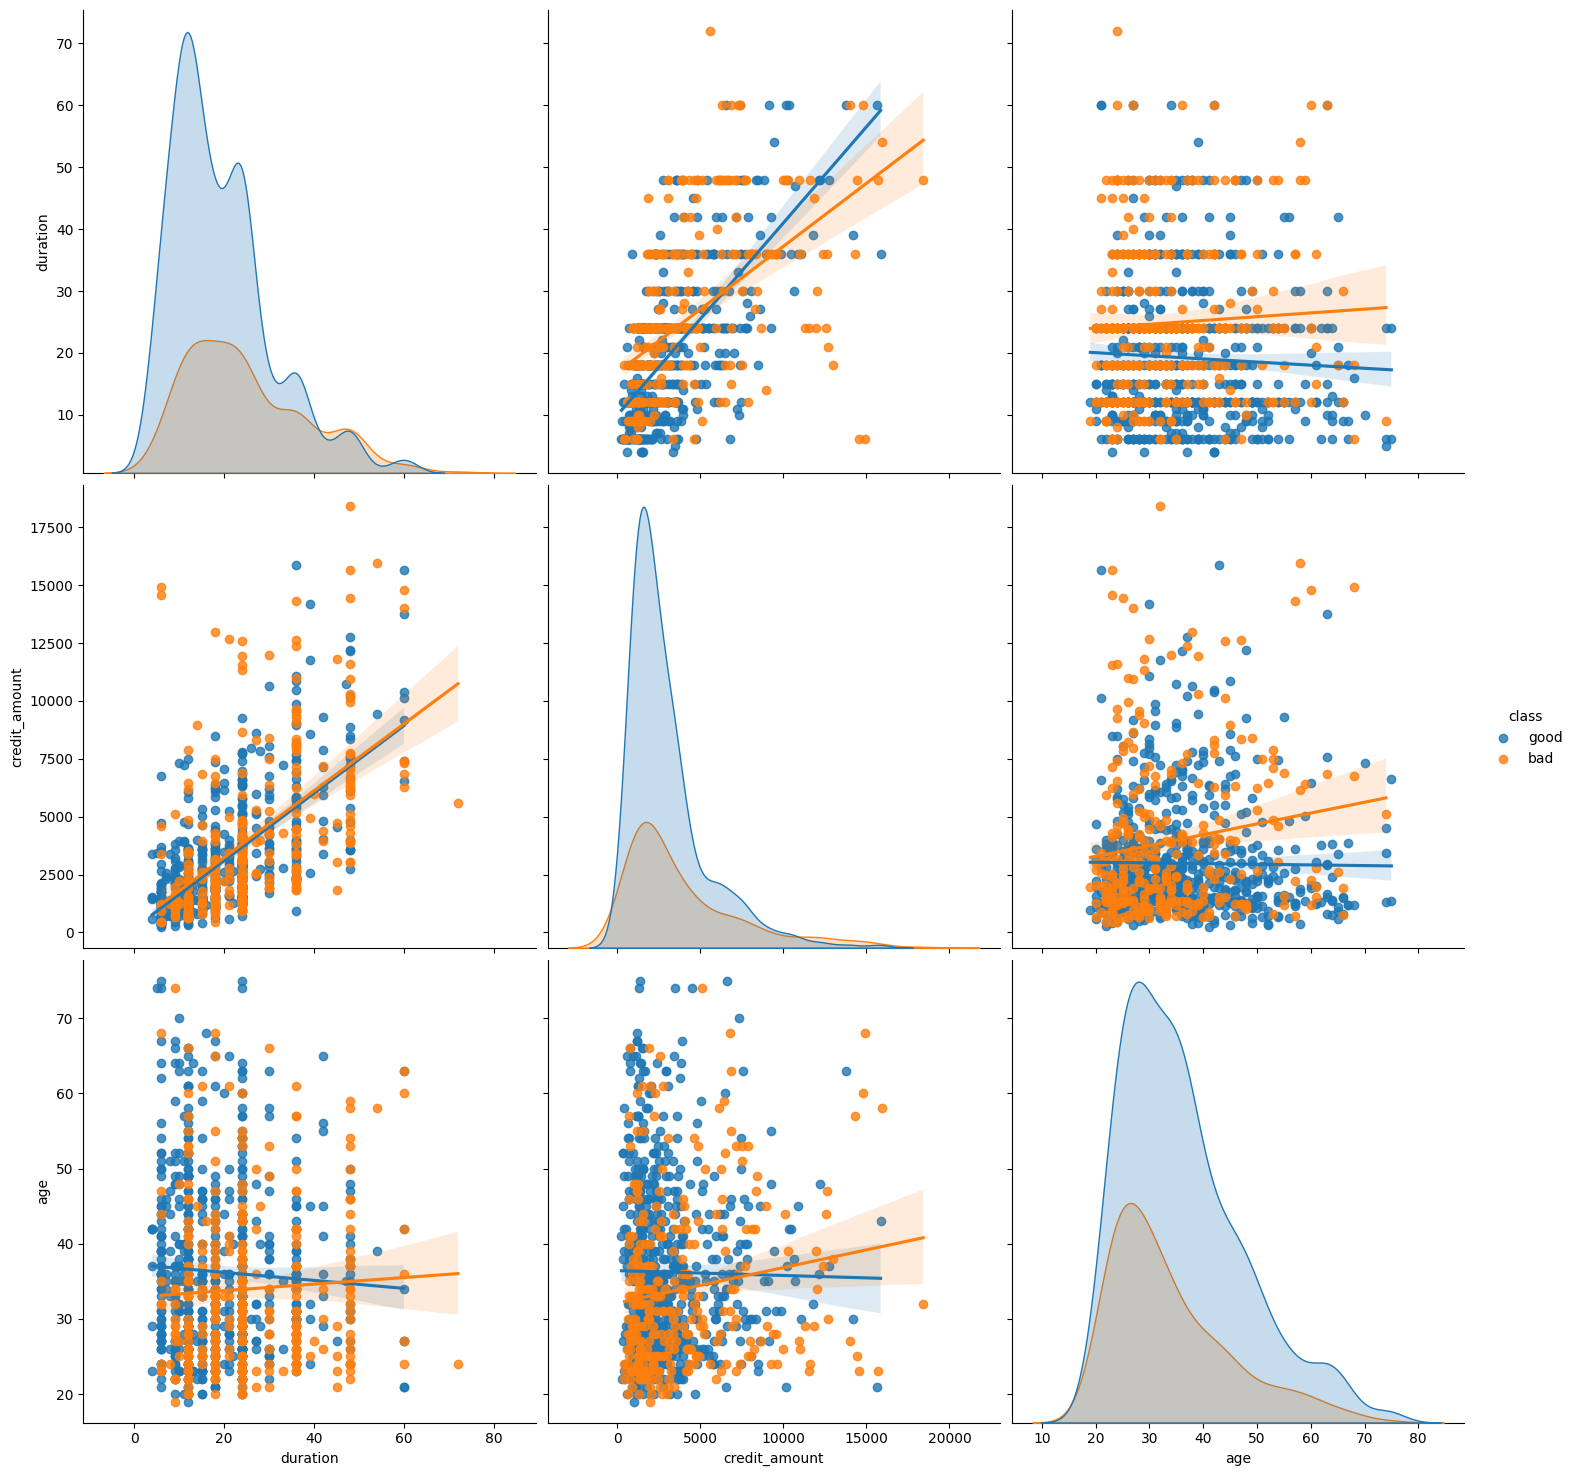

In [12]:
# Plot numerical variables against each other
sns.pairplot(credit_data[numerical+["class"]], hue="class", 
             kind='reg', height=5);

We note that there seem to be a strong correlation between `duration` and `credit_amount`, while it's significantly weaker between `duration` and `age` and between `credit_amount` and `age`.

It's reasonable that with larger `credit_amount`s, it also takes more time to pay it back.

Apparently, neither `duration` nor `credit_amount` are much affected by the `age` of the person taking the credit. This is somehow reasonable as there can be other factors that play bigger roles, such as the person's economical situation at the time, number of dependents (kids), employment etc., etc.

In [13]:
categorical_features = credit_data.select_dtypes(include=['object']).columns
numerical_features = credit_data.select_dtypes(include=['int64', 'float64']).columns
ordinal_features = ['checking_status', 'savings_status', 'employment', 'own_telephone']

print(categorical_features)
print(numerical_features)

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')
Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')


### Categorical Variables

Plot the categorical variables to display their respective class counts.

The columns `installment_commitment`, `residence_since`, `existing_credits` and `num_dependents` are all discrete ordinal variables, meaning that there is a natural ordering of the values. As for the purpose of visualisation, we can plot them using the same approach as the categorical variables.

Other columns, such as `checking_status` and `employment` probably possess similar characteristics, but they already count as categorical.

/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/3465287176.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=credit_data, palette='Set3')  # Set color palette
/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/3465287176.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Good", "Bad"], size=12)
/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/3465287176.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=credit_data, palette='Set3')  # Set color palette
/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp

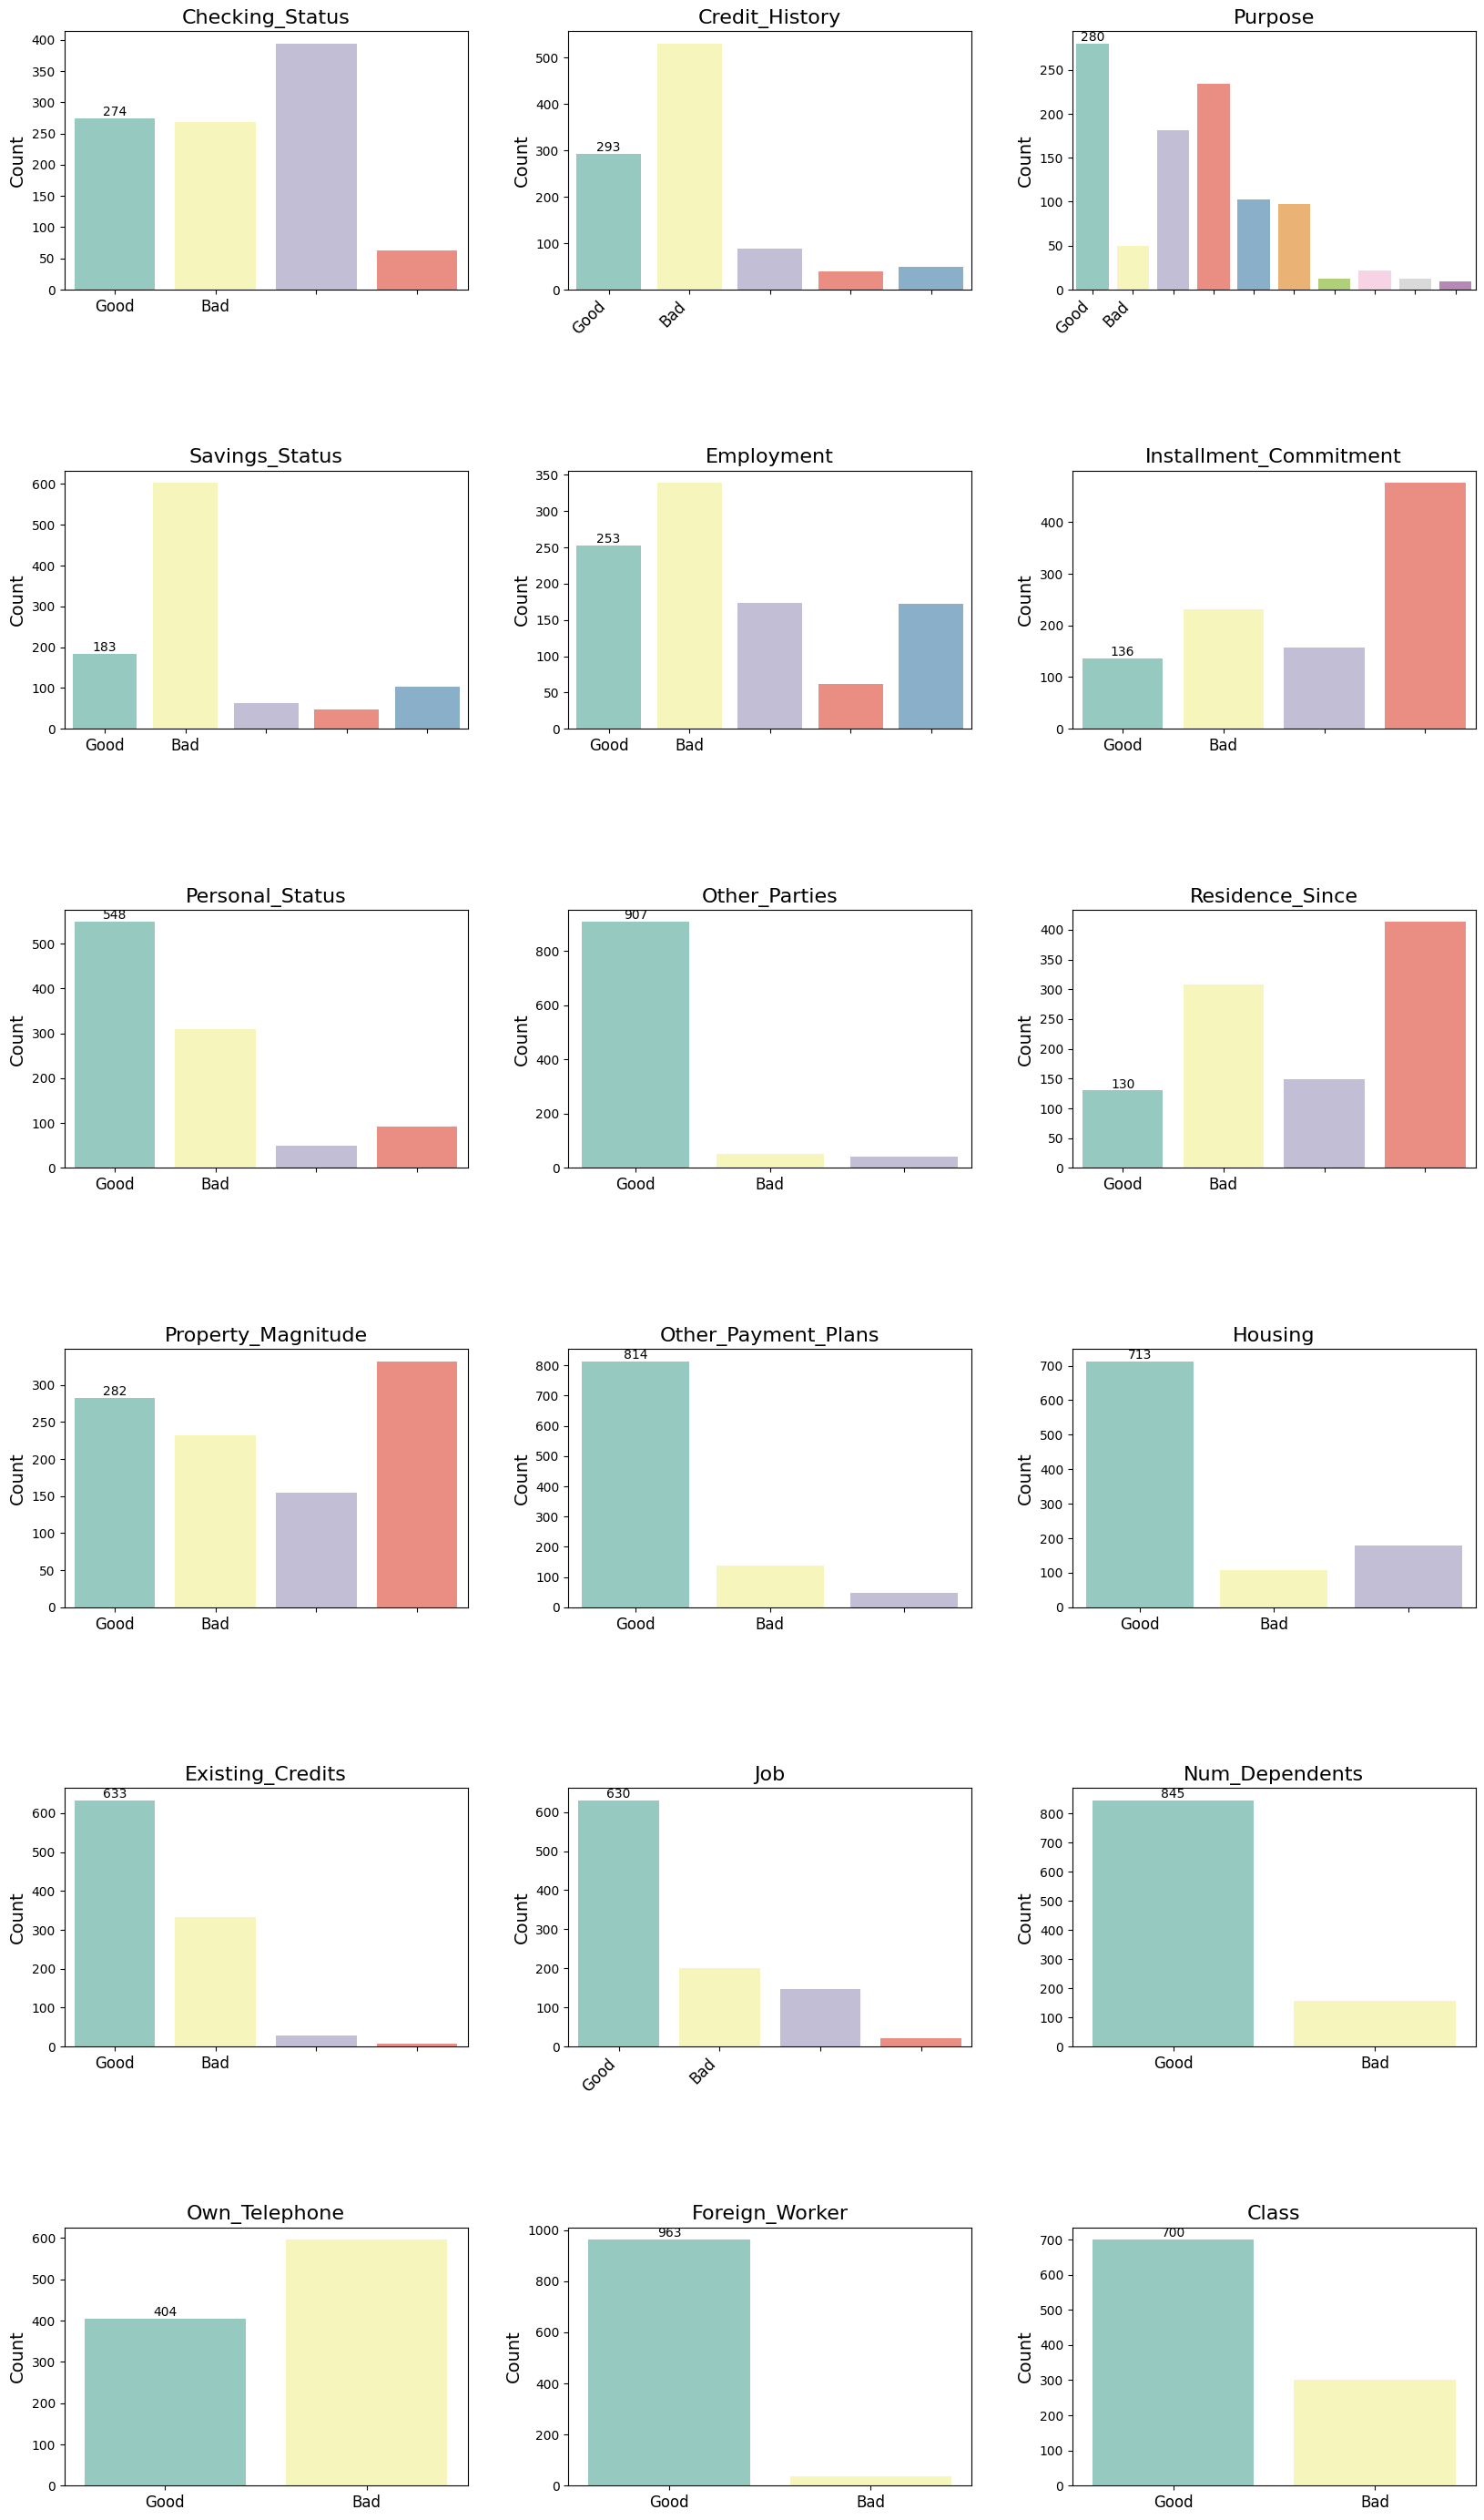

In [14]:
# Select categorical variables
categorical = [col for col in credit_data.columns if col not in numerical]

plt.figure(figsize=(20, 35))
for i, col in enumerate(credit_data[categorical], 1):
    
    # Plot corresponding variable
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, data=credit_data, palette='Set3')  # Set color palette
    
    # Adjust labels and title. Display each class count
    plt.xlabel("")
    plt.ylabel("Count", size=14)
    plt.title(col.title(), size=16)
    ax.bar_label(ax.containers[0])
    
    # Rotate long class names in some columns to make them easier to read
    if col in ['credit_history', 'purpose', 'job']:
        plt.xticks(rotation=45, horizontalalignment='right')
        
    # Set tick labels after setting ticks
    ax.set_xticklabels(["Good", "Bad"], size=12)
        
plt.subplots_adjust(hspace=0.7, wspace=0.25)
plt.show()


Among other things, we learn the following by studying above plot. I've added some additional comments and thoughts as well.

* There are five or fewer classes in each categorical column. Only `purpose` has more with 10.
* Most seem to take credit to buy a radio/tv, a new car or furniture. Hardly solid investments I'd say.
* 60% have few `savings` (savings_status = <100).
* Relatively few are unemployed (6.2%).
* 55% are single males. Why do males make up three classes while females only one?
* 91% take the credit on their own.
* 71% own their apartment/house. This is great!
* 63% have one existing credit.
* 63% have skilled job types while additionally 15% have highly skilled job types.
* 85% of credit takers have one dependent they need to provide for.
* Only 40% own a telephone. The data is probably not from this nor the previous decade (or perhaps, they refer to cell phones rather than the old school phones?).
* 96% are foreign workers. Is this really representative of the population or are we looking at a very biased sample?
* We have a slightly unbalanced dataset. 70% have good credit rating (class = good), while 30% have bad. (This is the target variable.)

Since the largest class make up 70% of the data, a perfectly naive model that always predicts this class would achieve 70% accuracy. This would obvisouly not be helpful, and our models should thus at least have an accuracy of 70% to be useful. **Baseline model accuracy is therefore: 70%.**

Note that the differences in counts in each variable should be checked using more formal statistical tests. The chi-square test is a common option - it can check all categorical columns at once.



#### Identify Features with the strongest Correlation to Credit Risk
There are many approaches we can take here. One way is to train a model and calculate the importance each feature has for predicting the target variable. Depending on the choice of algorithm, the importance is normally referred to as *feature importance or model coefficients*.

We can also train many models, starting out with the entire feature set, and remove one-by-one the feature that contributes the least until we end up with the top three. With this approach you are most likely to find the "best" feature set. However, this takes comparably a lot of time and we won't do that here.

Instead, we will calculate Pearson correlation coefficent for all features relative the target variable and display the results in a correlation matrix. It's a very fast approach while also providing us with a nice overview of each feature's contribution and their inter-correlations. The disadvantage is that features are only selected based on their individual contribution rather than combined contribution with other features.

We will start by reordering the columns so the target variable is the first column. This will make it easier to interpret the correlation matrix.

In [15]:
# Reorder columns so the target variable is at the first position
cols = list(credit_data.columns)
cols.remove('class')
cols.insert(0, 'class')
credit_dev = credit_data[cols]

# Randomly shuffle the data to minimise the effect of randomness on our results
credit_enc = credit_dev.sample(frac=1.0, random_state=55)

In [16]:
credit_enc

,class,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
458,good,<0,6,existing paid,domestic appliance,343,<100,<1,4,female div/dep/mar,...,1,real estate,27,none,own,1,skilled,1,none,yes
387,good,0<=X<200,18,critical/other existing credit,furniture/equipment,7374,<100,unemployed,4,male single,...,4,life insurance,40,stores,own,2,high qualif/self emp/mgmt,1,yes,yes
532,good,no checking,12,delayed previously,used car,1503,<100,1<=X<4,4,male mar/wid,...,4,real estate,41,none,rent,1,skilled,1,none,yes
895,good,no checking,36,delayed previously,used car,8947,no known savings,4<=X<7,3,male single,...,2,car,31,stores,own,1,high qualif/self emp/mgmt,2,yes,yes
239,good,<0,30,existing paid,radio/tv,2522,<100,>=7,1,male single,...,3,life insurance,39,none,own,1,skilled,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,good,0<=X<200,36,critical/other existing credit,used car,5800,<100,1<=X<4,3,male single,...,4,car,34,none,own,2,skilled,1,yes,yes
968,good,no checking,42,existing paid,radio/tv,7166,no known savings,4<=X<7,2,male mar/wid,...,4,life insurance,29,none,rent,1,skilled,1,yes,yes
295,bad,0<=X<200,48,existing paid,furniture/equipment,9960,<100,<1,1,female div/dep/mar,...,2,car,26,none,own,1,skilled,1,yes,yes
666,good,0<=X<200,30,all paid,furniture/equipment,3496,>=1000,1<=X<4,4,male single,...,2,car,34,stores,own,1,skilled,2,yes,yes


Next, we have to convert all columns into numerical to be able to calculate correlations. To facilitate, we convert the target variable in the same way by using the `OrdinalEncoder`. It's not completely accurate to encode all columns as ordinal categorical - we should instead aim for one-hot encoding in some cases - but since that will expand the feature significantly, with increased training time as a result, we will take this shortcut. The performance will likely only vary slightly.

In [17]:
# Select all categorical columns
# categorical = credit_enc.select_dtypes(include=['object']).columns
categorical_columns = [c for c in credit_enc.columns if c not in numerical]

# Define encoder. As we are dealing with categorical variables, make sure that the output are integers
oe = OrdinalEncoder(dtype=np.int64)

# Transform the categorical columns
credit_enc[categorical] = oe.fit_transform(credit_enc[categorical])

# Verify that it looks as expected
credit_enc.head()

,class,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
458,1,1,6,3,1,343,2,2,3,0,...,0,3,27,1,1,0,1,0,0,1
387,1,0,18,1,3,7374,2,4,3,3,...,3,1,40,2,1,1,0,0,1,1
532,1,3,12,2,9,1503,2,0,3,2,...,3,3,41,1,2,0,1,0,0,1
895,1,3,36,2,9,8947,4,1,2,3,...,1,0,31,2,1,0,0,1,1,1
239,1,1,30,3,6,2522,2,3,0,3,...,2,1,39,1,1,0,1,1,0,1


Calculate and display Pearson correlation matrix.

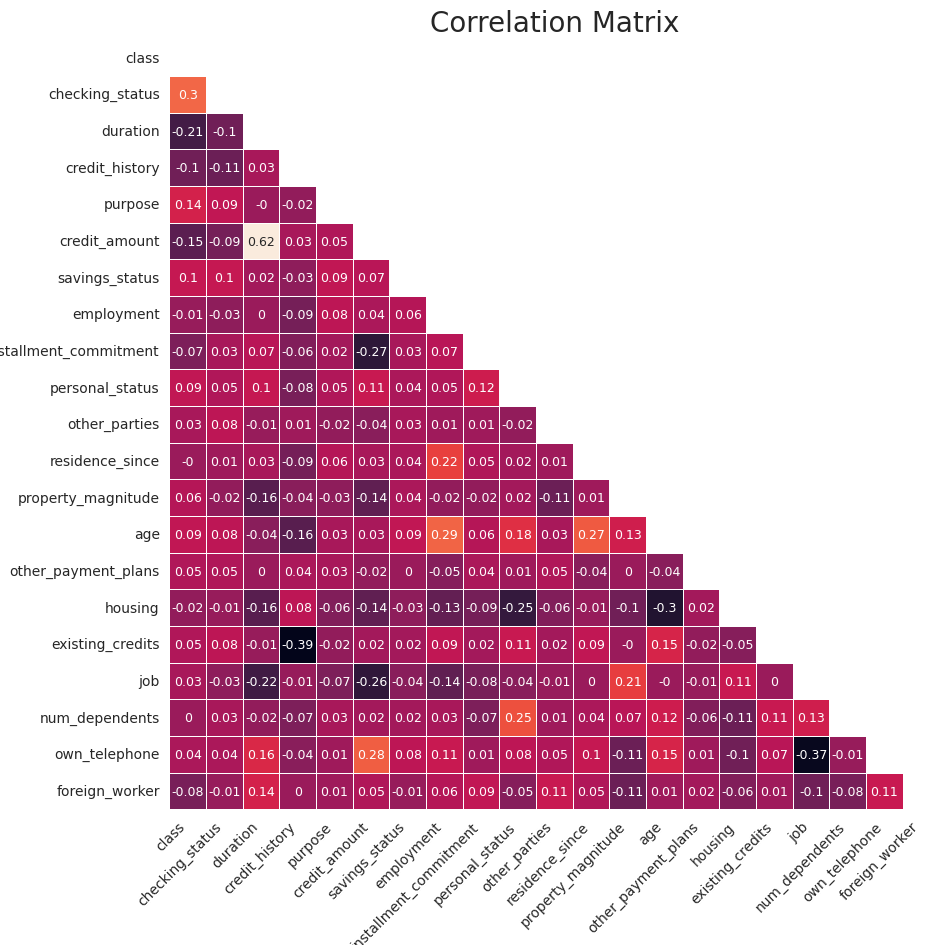

In [18]:
# Calculate correlation matrix
corr = credit_enc.corr()

# Create mask to remove the mirrored diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation matrix
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(np.round(corr, 2), square=True,  annot=True,  
                cbar=False,  linewidth=.5, mask=mask, annot_kws={"size": 9})
    
plt.title("Correlation Matrix", size=20)
plt.xticks(size=10, rotation=45, horizontalalignment='right')
plt.yticks(size=10);

We find that `checking_status`, `duration` and `credit_amount` are highest correlated with the target variable. Note that we consider the absolute value since we don't really care wheather the target variable is positively or negatively affected by a particular feature.

Additionally, we observe that there is little collinearity and that there are many variables that barely have any correlation with the target variable (e.g. `num_dependents`, `residence_since` and `employment`). The previously identified strong correlation between `credit_amount` and `duration` is confirmed.

Now when we have a slightly better general understanding, we can automate the selection of the top features using Scikit-learn's `SelectKBest` and the chi-squared stats `chi2` methods. There's a lot of experimentation we can do to find the optimal set of features, but to keep it simple, I will quite arbitrarly select the top 10. Note that we're also not considering any feature engineering.



/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_10128/3461539038.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=df_correlations, palette='coolwarm')


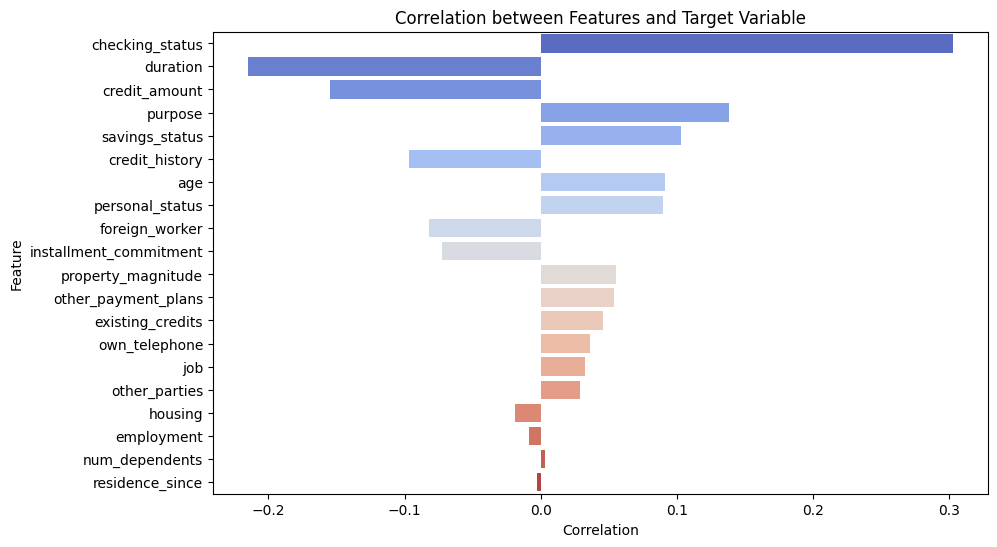

In [19]:
target_variable = 'class'


credit_data['class'] = pd.Categorical(credit_data['class']).codes

correlations = {}
for feature in credit_data.columns:
    if feature != target_variable:
        if credit_data[feature].dtype == 'object':
            # Convert categorical feature to numerical for correlation calculation
            numerical_feature = pd.Categorical(credit_data[feature]).codes
            correlation, _ = pearsonr(numerical_feature, credit_data[target_variable])
        else:
            correlation, _ = pearsonr(credit_data[feature], credit_data[target_variable])
        
        correlations[feature] = correlation


df_correlations = pd.DataFrame({'Feature': correlations.keys(), 'Correlation': correlations.values()})


df_correlations['Absolute Correlation'] = df_correlations['Correlation'].abs()
df_correlations = df_correlations.sort_values('Absolute Correlation', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=df_correlations, palette='coolwarm')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation between Features and Target Variable')
plt.show()

#### Split the Data into Development and Test sets
In order to have a dedicated dataset for testing, let's split it up and store it in different files

In [24]:
# Split the data into development and test sets
credit_dev, credit_test = train_test_split(credit_data, test_size=0.2, random_state=89, stratify=credit_data['class'])

# Save files for later
credit_dev.to_csv('../datasets/cleaned/train/credit_train.csv', index=False)
credit_test.to_csv('../datasets/cleaned/test/credit_test.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 
from scipy import stats
from scipy.stats import pearsonr # calculates the Pearson correlation coefficient between each feature and a target variable in a dataset. 
# It then visualizes these correlations using a bar plot.

# Sklearn
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


credit_data = pd.read_csv('../datasets/raw/credit-g.csv')

credit_data.info(show_counts=True)

credit_data.columns
credit_data.shape
credit_data.describe()
credit_data.nunique()
credit_data.rename(columns=lambda x: x.strip(), inplace=True)


# Select numerical variables
numerical = ['duration', 'credit_amount', 'age']

# Specify plot size and loop over each variable
plt.figure(figsize=(15, 15))
i = 1
for col in numerical:   
    # Plot the data using histograms, split by class
    plt.subplot(3, 2, i)
    sns.histplot(x=col, data=credit_data, hue='class', kde=True)
    plt.title(col.title(), size=16)
    plt.xlabel("")
    plt.ylabel("Count", size=14)
    
    # Plot the data using Boxplots
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(x='class', y=col, data=credit_data)
    ax.set_xticklabels(["Good", "Bad"], size=12)  # Set tick labels after setting ticks
    ax.set_xlabel("")  # Set x-label to empty string for better visualization
    plt.title(col.title(), size=16)
    plt.ylabel(col.title(), size=12)
    
    i += 2
    
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()


print("Duration:")
print(stats.describe(credit_data["duration"]))
print(stats.shapiro(credit_data["duration"]))

print("\nCredit Amount:")
print(stats.describe(credit_data["credit_amount"]))
print(stats.shapiro(credit_data["credit_amount"]))

print("\nAge:")
print(stats.describe(credit_data["age"]))
print(stats.shapiro(credit_data["age"]))

# Plot numerical variables against each other
sns.pairplot(credit_data[numerical+["class"]], hue="class", 
             kind='reg', height=5);

categorical_features = credit_data.select_dtypes(include=['object']).columns
numerical_features = credit_data.select_dtypes(include=['int64', 'float64']).columns
ordinal_features = ['checking_status', 'savings_status', 'employment', 'own_telephone']

print(categorical_features)
print(numerical_features)

# Select categorical variables
categorical = [col for col in credit_data.columns if col not in numerical]

plt.figure(figsize=(20, 35))
for i, col in enumerate(credit_data[categorical], 1):
    
    # Plot corresponding variable
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, data=credit_data, palette='Set3')  # Set color palette
    
    # Adjust labels and title. Display each class count
    plt.xlabel("")
    plt.ylabel("Count", size=14)
    plt.title(col.title(), size=16)
    ax.bar_label(ax.containers[0])
    
    # Rotate long class names in some columns to make them easier to read
    if col in ['credit_history', 'purpose', 'job']:
        plt.xticks(rotation=45, horizontalalignment='right')
        
    # Set tick labels after setting ticks
    ax.set_xticklabels(["Good", "Bad"], size=12)
        
plt.subplots_adjust(hspace=0.7, wspace=0.25)
plt.show()

# Reorder columns so the target variable is at the first position
cols = list(credit_data.columns)
cols.remove('class')
cols.insert(0, 'class')
credit_dev = credit_data[cols]

# Randomly shuffle the data to minimise the effect of randomness on our results
credit_enc = credit_dev.sample(frac=1.0, random_state=55)

# Select all categorical columns
# categorical = credit_enc.select_dtypes(include=['object']).columns
categorical_columns = [c for c in credit_enc.columns if c not in numerical]

# Define encoder. As we are dealing with categorical variables, make sure that the output are integers
oe = OrdinalEncoder(dtype=np.int64)

# Transform the categorical columns
credit_enc[categorical] = oe.fit_transform(credit_enc[categorical])

# Verify that it looks as expected
credit_enc.head()


# Calculate correlation matrix
corr = credit_enc.corr()

# Create mask to remove the mirrored diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation matrix
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(np.round(corr, 2), square=True,  annot=True,  
                cbar=False,  linewidth=.5, mask=mask, annot_kws={"size": 9})
    
plt.title("Correlation Matrix", size=20)
plt.xticks(size=10, rotation=45, horizontalalignment='right')
plt.yticks(size=10);

target_variable = 'class'


credit_data['class'] = pd.Categorical(credit_data['class']).codes

correlations = {}
for feature in credit_data.columns:
    if feature != target_variable:
        if credit_data[feature].dtype == 'object':
            # Convert categorical feature to numerical for correlation calculation
            numerical_feature = pd.Categorical(credit_data[feature]).codes
            correlation, _ = pearsonr(numerical_feature, credit_data[target_variable])
        else:
            correlation, _ = pearsonr(credit_data[feature], credit_data[target_variable])
        
        correlations[feature] = correlation


df_correlations = pd.DataFrame({'Feature': correlations.keys(), 'Correlation': correlations.values()})


df_correlations['Absolute Correlation'] = df_correlations['Correlation'].abs()
df_correlations = df_correlations.sort_values('Absolute Correlation', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=df_correlations, palette='coolwarm')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation between Features and Target Variable')
plt.show()

In [17]:
credit_data['class'].value_counts()

class
1    700
0    300
Name: count, dtype: int64

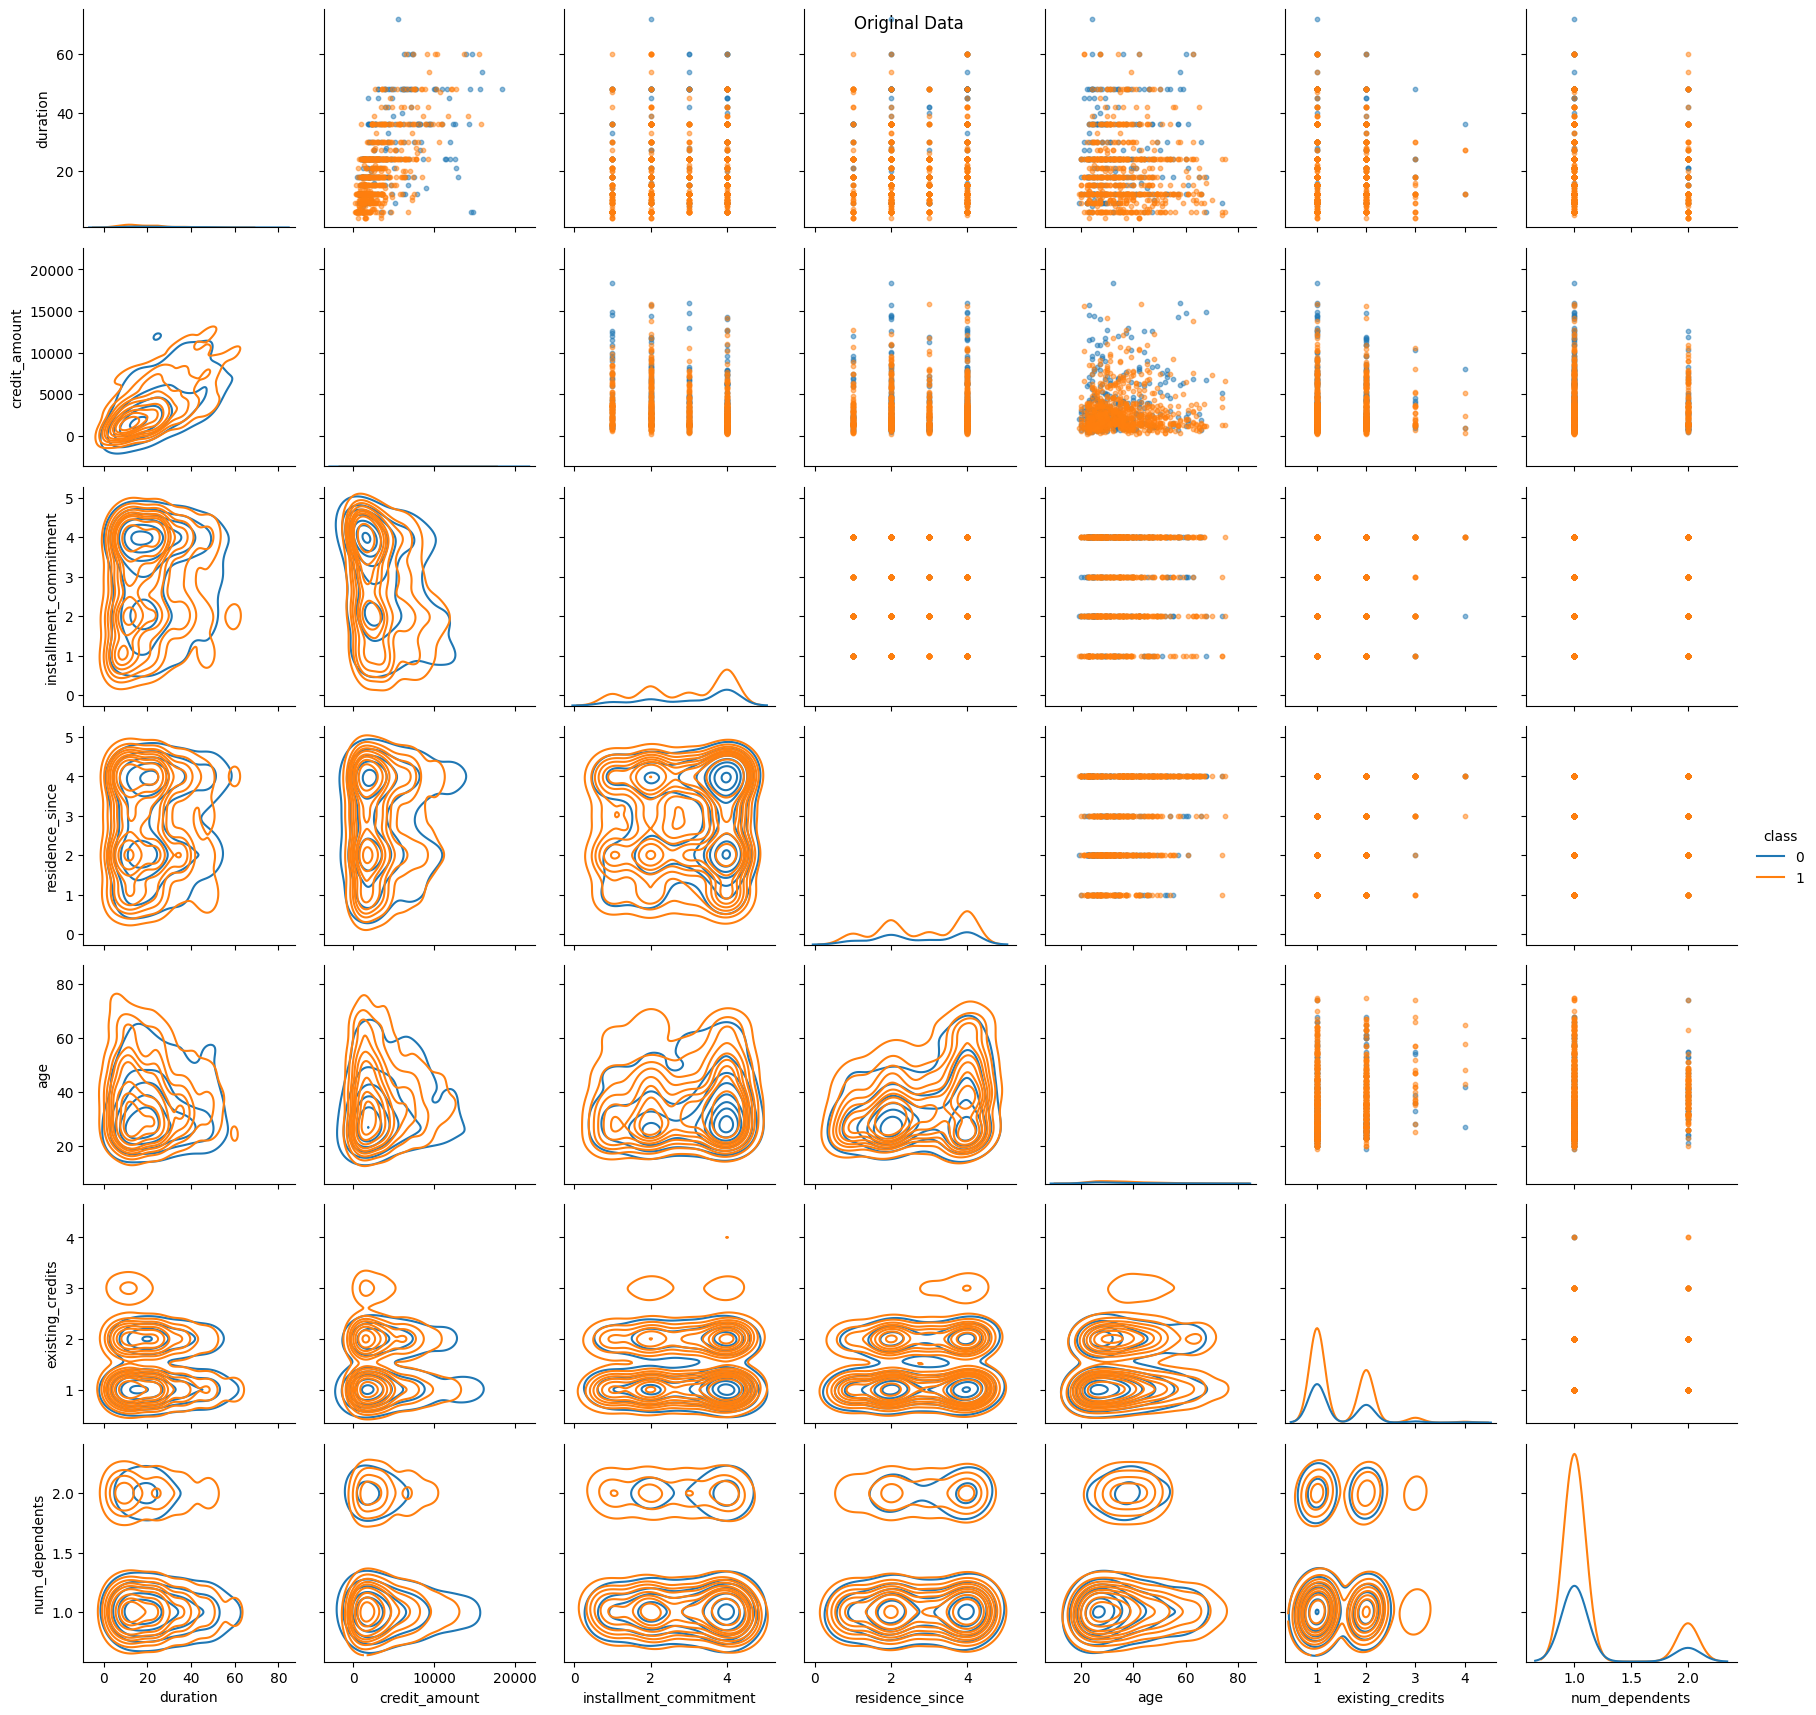

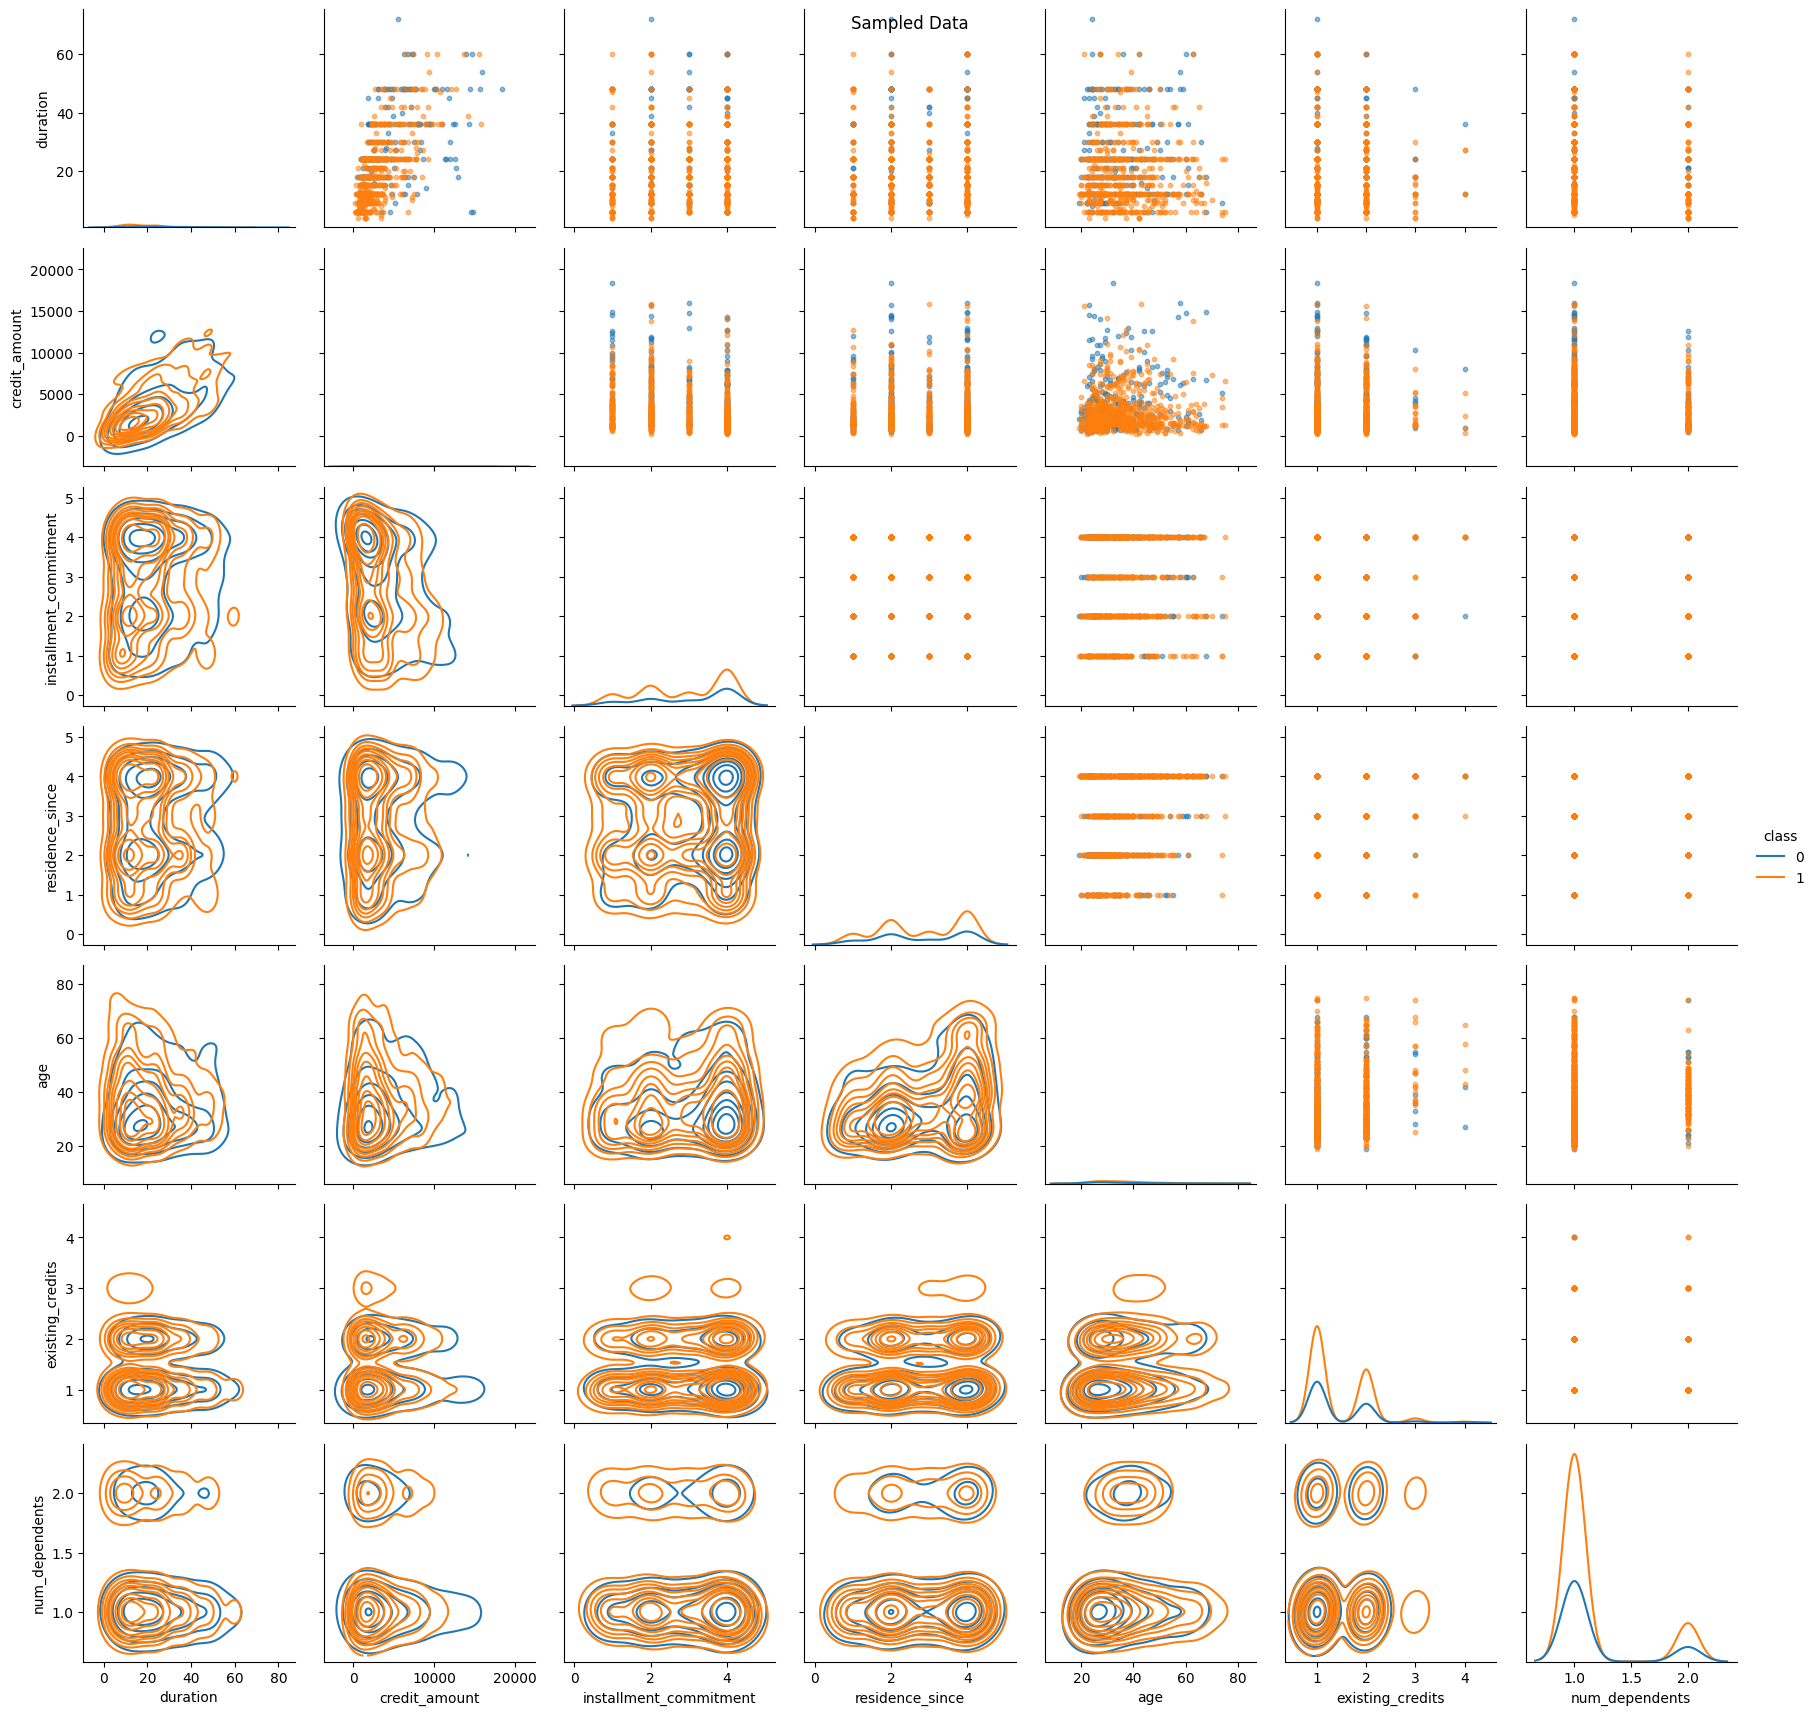

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Create a PairGrid plot for the original data
plot_grid_original = sns.PairGrid(data=credit_data, hue='class')
plot_grid_original = plot_grid_original.map_upper(plt.scatter, alpha=.5, s=10)
plot_grid_original = plot_grid_original.map_lower(sns.kdeplot)
plot_grid_original = plot_grid_original.map_diag(sns.kdeplot)
plot_grid_original.add_legend()
plot_grid_original.fig.suptitle('Original Data')
plt.show()

# Apply RandomUnderSampler
data_sampled, y_sampled = (
    RandomUnderSampler(sampling_strategy=.45, random_state=0)
    .fit_resample(credit_data.drop(columns='class'), credit_data['class'])
)
data_sampled['class'] = y_sampled

# Create a PairGrid plot for the sampled data
plot_grid_sampled = sns.PairGrid(data=data_sampled, hue='class')
plot_grid_sampled = plot_grid_sampled.map_upper(plt.scatter, alpha=.5, s=10)
plot_grid_sampled = plot_grid_sampled.map_lower(sns.kdeplot)
plot_grid_sampled = plot_grid_sampled.map_diag(sns.kdeplot)
plot_grid_sampled.add_legend()
plot_grid_sampled.fig.suptitle('Sampled Data')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

selected_features = numerical_features.tolist() + ordinal_features
df_selected = data[selected_features + ['Class']].copy()
X = df_selected[selected_features].values


label_encoder = LabelEncoder()
for feature in ordinal_features:
    df_selected[feature] = label_encoder.fit_transform(df_selected[feature])

X = df_selected[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    
    

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Class'] = df_selected['Class']


sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Components')
plt.show()

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


df_tsne = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Class'] = df_selected['Class']


sns.scatterplot(data=df_tsne, x='Dimension 1', y='Dimension 2', hue='Class')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix